In [ ]:
import geopandas as gpd
import pandas as pd
import rasterio
from rasterio.features import shapes
import rioxarray
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import slic
from shapely.geometry import shape
from rasterstats import zonal_stats

%matplotlib inline

%load_ext autoreload
%autoreload 2

from gridflow import model
from gridflow.visuals import country_viz
from gridflow import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
plt.style.use('fivethirtyeight')

### Demo notebook
This notebook demonstrates the capabilities of the gridflow package.

In [ ]:
from gridflow import model
from gridflow.visuals import country_viz
from gridflow.epm_input_generator import generate_epm_inputs
countries = ["LUX"]

In [ ]:
levant = model.region(countries, "data/global_datasets")
levant.create_zones(n=5)

In [ ]:
levant.zones

,geometry,country
0,"MULTIPOLYGON (((34.95833 42.09167, 35.02500 42...",TUR
1,"POLYGON ((42.66667 41.60000, 42.70833 41.60000...",TUR
2,"MULTIPOLYGON (((33.63333 40.85833, 33.66667 40...",TUR
3,"MULTIPOLYGON (((33.25833 40.51667, 33.25833 40...",TUR
4,"MULTIPOLYGON (((26.43333 38.20000, 26.42500 38...",TUR
5,"POLYGON ((42.20000 37.31667, 42.22500 37.31667...",SYR
6,"POLYGON ((38.23333 36.92500, 38.25000 36.92500...",SYR
7,"POLYGON ((36.66667 36.82500, 36.73333 36.82500...",SYR
8,"POLYGON ((39.46667 35.52500, 39.54167 35.52500...",SYR
9,"POLYGON ((37.55833 34.88333, 37.56667 34.88333...",SYR


In [ ]:
levant.zone_stats

,population
0,5.178134e+07
1,1.465312e+07
2,2.404760e+07
3,3.167480e+07
4,5.522968e+04
5,4.453484e+06
6,3.762780e+06
7,1.792288e+07
8,8.626072e+05
9,1.134099e+07


In [ ]:
levant.create_network()

/Users/mohini/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


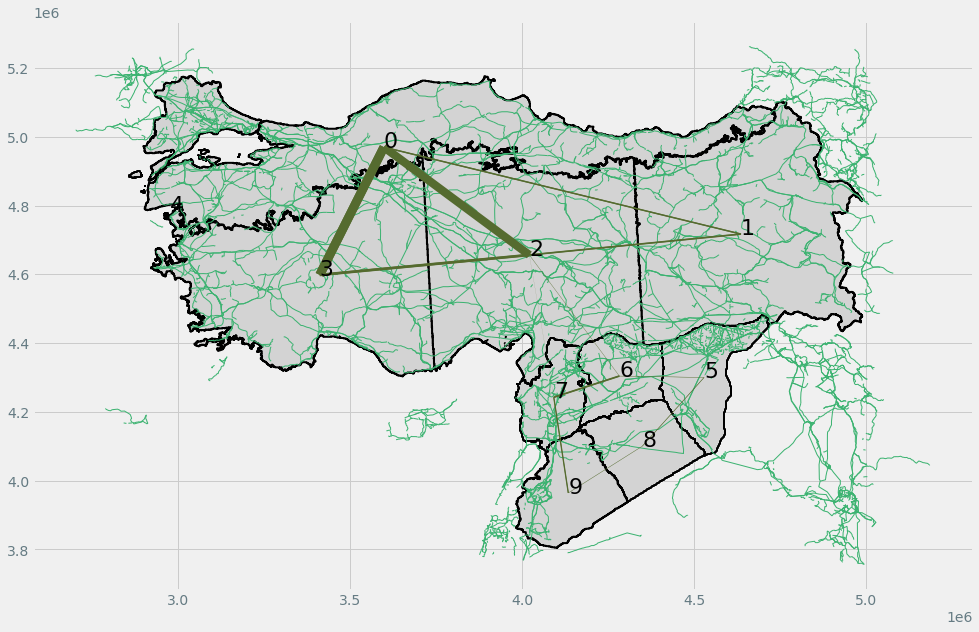

In [ ]:
country_viz(levant)

/Users/mohini/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


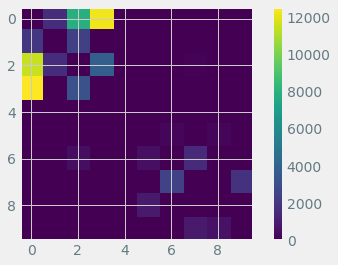

In [ ]:
plt.imshow(levant.grid.flow)
plt.colorbar()